In [313]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [314]:
#path to data
train_data = pd.read_csv("Dataset/train.csv")
building_structure_data = pd.read_csv("Dataset/Building_Structure.csv")
building_ownership_data = pd.read_csv("Dataset/Building_Ownership_Use.csv")

In [315]:
#merging the data into a single dataframe
train_data = pd.merge(train_data, building_structure_data, on='building_id')
train_data = pd.merge(train_data, building_ownership_data, on='building_id')

In [316]:
#fill missing values with 0
train_data.fillna(0, inplace=True)

In [317]:
#mapping numerical values to damage grade types
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
train_data.damage_grade = train_data.damage_grade.map(categories)

In [318]:
#calculating average damage grade per district
dist_ids = sorted(train_data.district_id.unique())
avg_dmg_grd = [0] * len(dist_ids)
avg_dmg_count = [0] * len(dist_ids)
j=0
for i in train_data.district_id:
    ind = distids.index(i)
    avg_dmg_count[ind]+=1
    avg_dmg_grd[ind]+=train_data.damage_grade[j]
    j+=1
for i in range(0, len(dist_ids)):
    avg_dmg_grd[i]=avg_dmg_grd[i]/avg_dmg_count[i]
avg_dmg = pd.DataFrame(data={'district_id': dist_ids, 'avg_damage_grade': avg_dmg_grd})
avg_dmg = avg_dmg.sort_values(by=['district_id']).reset_index(drop=True)

Text(0,0.5,'Damage Grade')

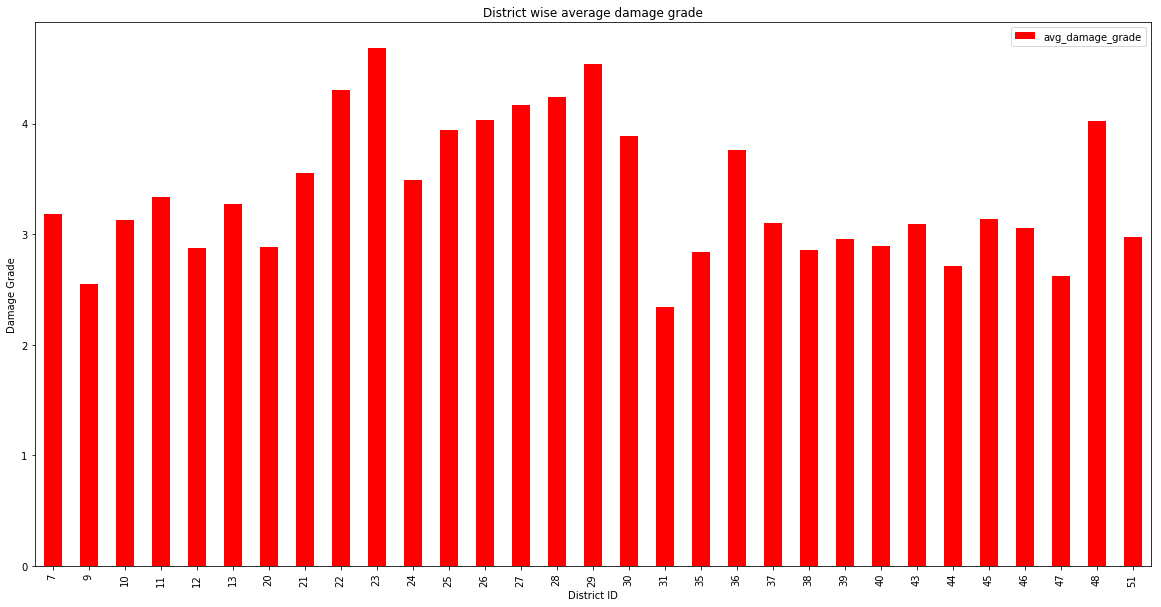

In [319]:
#plotting the graph for the same
fig_size[0]= 14
fig_size[1]= 7
plt.rcParams['figure.figsize']=(20,10)
a = avg_dmg.plot(x='district_id', y='avg_damage_grade', kind='bar', color = ['red'])
a.set_title('District wise average damage grade')
a.set_xlabel('District ID')
a.set_ylabel('Damage Grade')

In [320]:
#taking a random district and finding average damage grade
#file23.csv contains the data corresponding to the district 39
d39 = pd.read_csv("Dataset/file23.csv")
md39 = sorted(d39.mun_id.unique())
md39sum = [0] * len(md39)
md39count = [0] * len(md39)
j=0
for i in d39.mun_id:
    ind = md39.index(i)
    md39count[ind]+=1
    md39sum[ind]+=d39.grade[j]
    j+=1
for i in range(0, len(md39)):
    md39sum[i]=md39sum[i]/md39count[i]
df39 = pd.DataFrame(data={'mun_id': md39, 'avg_damage_grade': md39sum})

Text(0,0.5,'Damage Grade')

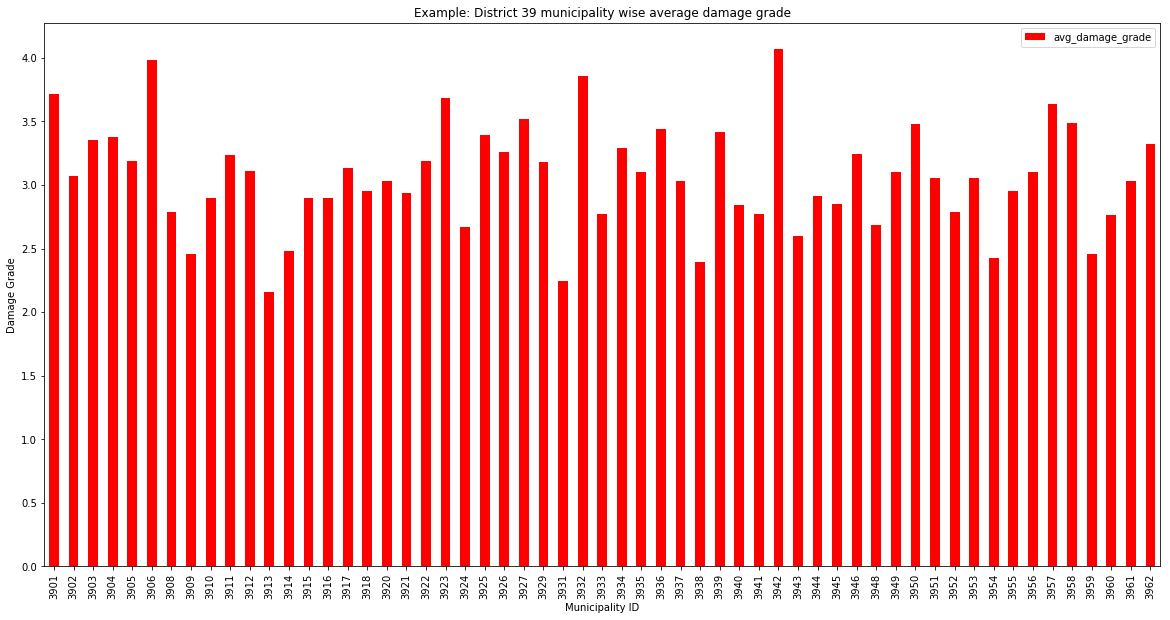

In [321]:
#plotting the graph
fig_size[0]= 14
fig_size[1]= 7
c = df39.plot(x='mun_id', y='avg_damage_grade', kind='bar', color = ['red'])
c.set_title('Example: District 39 municipality wise average damage grade')
c.set_xlabel('Municipality ID')
c.set_ylabel('Damage Grade')

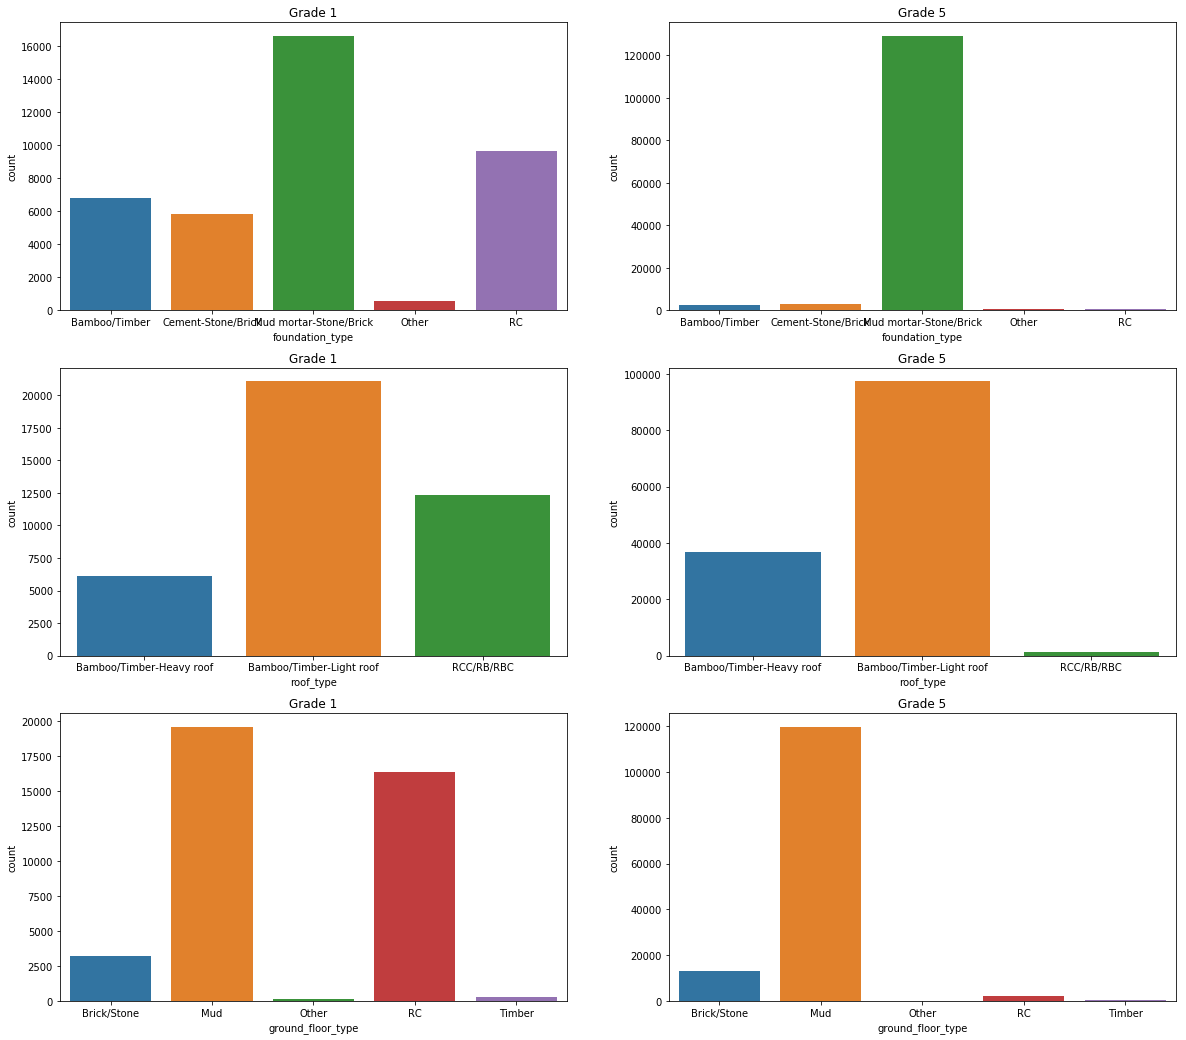

In [322]:
#graphs for some features for grade 1 and grade 5 buildings
#grade_1.csv and grade_5.csv contain the respective features of the buildings of damage grade 1 and 5 respectively
g1 = pd.read_csv("Dataset/grade_1.csv")
g5 = pd.read_csv("Dataset/grade_5.csv")
g1 = pd.merge(g1, building_structure_data, on='building_id')
g5 = pd.merge(g5, building_structure_data, on='building_id')

plt.rcParams['figure.figsize']=(20,18)
f, ax = plt.subplots(ncols=2, nrows=3)
ax[0][0].set_title('Grade 1')
g1 = g1.sort_values(by=['foundation_type']).reset_index(drop=True)
sns.countplot(x='foundation_type', data = g1, ax=ax[0][0])
ax[0][1].set_title('Grade 5')
g5 = g5.sort_values(by=['foundation_type']).reset_index(drop=True)
sns.countplot(x='foundation_type', data = g5, ax=ax[0][1])
ax[1][0].set_title('Grade 1')
g1 = g1.sort_values(by=['roof_type']).reset_index(drop=True)
sns.countplot(x='roof_type', data = g1, ax=ax[1][0])
ax[1][1].set_title('Grade 5')
g5 = g5.sort_values(by=['roof_type']).reset_index(drop=True)
sns.countplot(x='roof_type', data = g5, ax=ax[1][1])
ax[2][0].set_title('Grade 1')
g1 = g1.sort_values(by=['ground_floor_type']).reset_index(drop=True)
sns.countplot(x='ground_floor_type', data = g1, ax=ax[2][0])
ax[2][1].set_title('Grade 5')
g5 = g5.sort_values(by=['ground_floor_type']).reset_index(drop=True)
sns.countplot(x='ground_floor_type', data = g5, ax=ax[2][1])

# we can infer that to minimize earthquake damage, Foundation type must be RC, Roof type must be RCC/RB/RBC, Ground floor type must be RC